## Credit Card Fraud Detection Project

In [2]:
# Import the necessary modules

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from collections import Counter
import itertools

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [14]:
# Load the csv file

dataframe = pd.read_csv("C:\\Users\\Rajini\\MyJup\\DecisionTreeRandomForest\\CreditCardFraudDetect\\creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Perform Exploratory Data Analysis

In [15]:
# from termcolor import colored as cl # text customization

Total_transactions = len(dataframe)
normal = len(dataframe[dataframe.Class == 0])
fraudulent = len(dataframe[dataframe.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))
# print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
# Check for null values
dataframe.isnull().values.any()

False

In [20]:
# non_fraud = len(dataframe[dataframe.Class == 0])
# fraud = len(dataframe[dataframe.Class == 1])
# fraud_percent = (fraud / (fraud + non_fraud)) * 100

# print("Number of Genuine transactions: ", non_fraud)
# print("Number of Fraud transactions: ", fraud)
# print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Class
0    284315
1       492
dtype: int64
<class 'pandas.core.series.Series'>


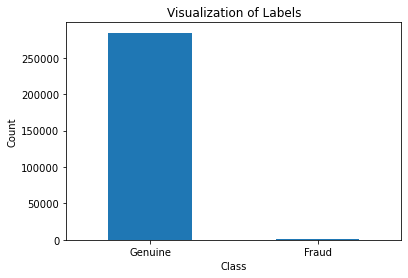

In [50]:
# Visualize the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
print(count_classes)
print(type(count_classes))
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [51]:
print(min(dataframe.Amount), max(dataframe.Amount))
dataframe["Amount"].describe()

0.0 25691.16


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

I have observed in our data 28 features are transformed versions of PCA but the Amount is the original one. 
And, while checking the minimum and maximum is in the amount
 — I found the difference is huge that can deviate our result.

In this case, it is a good practice to scale this variable. We can use a standard scaler to make it fix.

In [54]:
# Perform Scaling on Amount and drop the Time and original Amount columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataframe["ScaledAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))


dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)
dataframe.shape

(284807, 30)

In [58]:
print(min(dataframe.ScaledAmount), max(dataframe.ScaledAmount))
dataframe["ScaledAmount"].describe()

-0.35322939296682354 102.36224270928423


count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: ScaledAmount, dtype: float64

In [61]:
dataframe.drop_duplicates(inplace= True)
dataframe.shape

(275663, 30)

In [62]:
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [63]:
# Split the data
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (192964, 29)
Shape of test_X:  (82699, 29)


Let's train different models on our dataset and observe which algorithm works better for our problem.

Let's apply Random Forests and Decision Trees algorithms to our dataset.

In [64]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

In [65]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

In [66]:
# Print scores of our classifiers

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.94921341249592
Decision Tree Score:  99.92744773213703


In [67]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [68]:
# Plot confusion matrix for Decision Trees

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[82528    35]
 [   25   111]]


Confusion matrix, without normalization


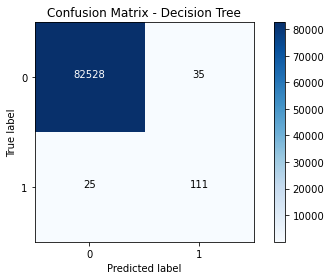

In [69]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [70]:
# Plot confusion matrix for Random Forests

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[82551    12]
 [   30   106]]


Confusion matrix, without normalization


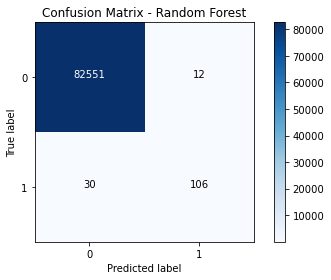

In [71]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [72]:
# The below function prints the following necesary metrics

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
    

In [73]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99927
Precision: 0.76027
Recall: 0.81618
F1-score: 0.78723


In [74]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99949
Precision: 0.89831
Recall: 0.77941
F1-score: 0.83465


Clearly, Random Forest model works better than Decision Trees

But, if we clearly observe our dataset suffers a serious problem of **class imbalance**. 
The genuine (not fraud) transactions are more than 99% with the fraud transactions constituting of 0.17%.

With such kind of distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there are more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques. **Over sampling** is one of them.
 
One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. 

Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique**, or **SMOTE** for short.

In [76]:
# Performing oversampling on RF and DT

from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (550380, 29)
Resampled shape of Y:  (550380,)
Counter({0: 275190, 1: 275190})


In [77]:
# Build the Random Forest classifier on the new dataset

rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [78]:
# Visualize the confusion matrix

# cm_resampled = confusion_matrix(test_Y, y_predict.round())
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

Confusion Matrix - Random Forest
[[82635     8]
 [    1 82470]]


Confusion matrix, without normalization


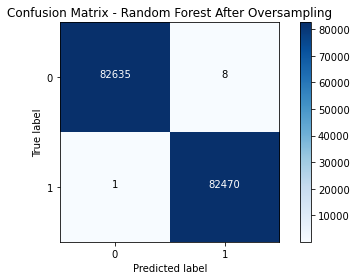

In [79]:
plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

In [80]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99995
Precision: 0.99990
Recall: 0.99999
F1-score: 0.99995


Now it is evident that after addressing the class imbalance problem, our Random forest classifier with SMOTE performs far better than the Random forest classifier withour SMOTE

In [81]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(train_X, train_Y)

predictions_KNN = KNN.predict(test_X)
KNN_score = KNN.score(test_X, test_Y) * 100

In [46]:
# Let’s check the accuracy of our K-Nearest Neighbors model.
print('K-Nearest Neighbors score: ', KNN_score)


K-Nearest Neighbors score:  99.94679500356716


In [48]:
# Plot confusion matrix for K-Nearest Neighbors

confusion_matrix_KNN = confusion_matrix(test_Y, predictions_KNN.round())
print("Confusion Matrix - K Nearest Neighbor")
print(confusion_matrix_KNN)

Confusion Matrix - K Nearest Neighbor
[[82550    13]
 [   31   105]]


Confusion matrix, without normalization


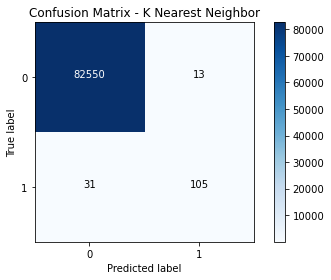

In [56]:
plot_confusion_matrix(confusion_matrix_KNN, classes=[0, 1], title= "Confusion Matrix - K Nearest Neighbor")

In [60]:
print("Evaluation of K-Nearest Neighbors Model")
print()
metrics(test_Y, predictions_KNN.round())

Evaluation of K-Nearest Neighbors Model

Accuracy: 0.99947
Precision: 0.88983
Recall: 0.77206
F1-score: 0.82677


In [44]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge

lr = LogisticRegression()
lr.fit(train_X, train_Y)
predictions_lr = lr.predict(test_X)
lr_score = lr.score(test_X, test_Y) * 100

In [61]:
# Let’s check the accuracy of our Logistic Regression model.
print('Logistic Regression score is {}'.format(lr_score))


Logistic Regression score is 99.91293727856443


In [65]:
# Plot confusion matrix for Logistic Regression model

confusion_matrix_lr = confusion_matrix(test_Y, predictions_lr.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lr)

Confusion Matrix - Logistic Regression
[[82549    14]
 [   58    78]]


Confusion matrix, without normalization


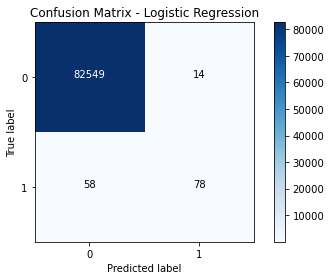

In [67]:
plot_confusion_matrix(confusion_matrix_lr, classes=[0, 1], title= "Confusion Matrix - Logistic Regression")

In [66]:
print("Evaluation of Logistic Regression Model")
print()
metrics(test_Y, predictions_lr.round())

Evaluation of Logistic Regression Model

Accuracy: 0.99913
Precision: 0.84783
Recall: 0.57353
F1-score: 0.68421


In [68]:
# Support Vector Machines

from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

svm = SVC()
svm.fit(train_X, train_Y)
predictions_svm = svm.predict(test_X)
svm_score = svm.score(test_X, test_Y) * 100

In [69]:
# Let’s check the accuracy of our Support Vector Machine model.
print('Support Vector Machine score is {}'.format(svm_score))

Support Vector Machine score is 99.93712136785209


In [70]:
# Plot confusion matrix for Support Vector Machine model

confusion_matrix_svm = confusion_matrix(test_Y, predictions_svm.round())
print("Confusion Matrix - Support Vector Machine")
print(confusion_matrix_svm)

Confusion Matrix - Support Vector Machine
[[82556     7]
 [   45    91]]


Confusion matrix, without normalization


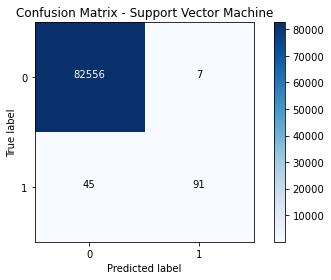

In [71]:
plot_confusion_matrix(confusion_matrix_svm, classes=[0, 1], title= "Confusion Matrix - Support Vector Machine")

In [72]:
print("Evaluation of Support Vector Machine Model")
print()
metrics(test_Y, predictions_svm.round())

Evaluation of Support Vector Machine Model

Accuracy: 0.99937
Precision: 0.92857
Recall: 0.66912
F1-score: 0.77778


In [74]:
# Random Forest
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor

rf = RandomForestClassifier(max_depth = 4)
rf.fit(train_X, train_Y)
predictions_rf = rf.predict(test_X)
rf_score = rf.score(test_X, test_Y) * 100

In [75]:
# Let’s check the accuracy of our Support Vector Machine model.
print('Random Forest model score is {}'.format(rf_score))

Random Forest model score is 99.93107534553018


In [76]:
# Plot confusion matrix for Support Vector Machine model

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest model")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest model
[[82549    14]
 [   43    93]]


Confusion matrix, without normalization


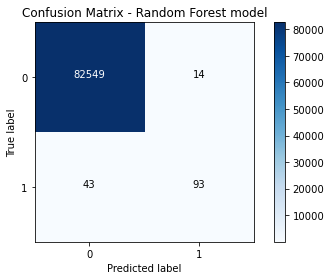

In [77]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest model")

In [78]:
print("Evaluation of Random Forest model")
print()
metrics(test_Y, predictions_svm.round())

Evaluation of Random Forest model

Accuracy: 0.99937
Precision: 0.92857
Recall: 0.66912
F1-score: 0.77778


In [2]:
# XGBoost
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier

# rf = RandomForestClassifier(max_depth = 4)
# rf.fit(train_X, train_Y)
# predictions_rf = rf.predict(test_X)
# rf_score = rf.score(test_X, test_Y) * 100

ModuleNotFoundError: No module named 'xgboost'